In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Pretty variable display 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# New starting stats for data4 (copied from data3)

Steps:
  - Decide on new starting stats
  - Save `data4_clean.csv`
  - transform data
    - write out `data4_tr.csv`
  - PCA
    - write out `pca4_99.csv`



In [2]:
df_master = pd.read_csv('../data/master_1996_2019.csv', index_col=0)
df_master.shape
df_master.head()

(11149, 86)

,%3PA,%3PM,%AST,%BLK,%BLKA,%DREB,%FGA,%FGA 2PT,%FGA 3PT,%FGM,...,REB%,STL,TD3,TEAM,TO RATIO,TOT MIN,TOV,TS%,USG%,W
A.C. Green 96,2.6,0.4,6.8,8.4,15.5,29.9,11.8,95.9,4.1,13.3,...,13.5,1.5,0,DAL,10.3,2494.0,1.6,52.3,11.8,23
Aaron McKie 96,16.6,19.6,25.2,12.4,22.6,17.7,14.4,71.8,28.2,13.2,...,7.1,2.5,0,DET,13.5,1624.0,2.9,52.4,14.2,48
Aaron Williams 96,0.5,0.0,6.3,40.8,11.9,24.3,16.6,99.3,0.7,22.4,...,12.9,1.5,0,VAN,15.0,562.0,3.0,59.9,16.1,4
Acie Earl 96,2.9,0.0,11.1,49.1,14.5,20.5,22.3,97.2,2.8,20.5,...,9.4,1.5,0,MIL,12.7,500.0,3.5,43.5,22.0,14
Adam Keefe 96,0.5,0.0,6.7,16.9,16.5,24.4,11.3,99.4,0.6,11.6,...,12.9,1.7,0,UTA,15.9,917.0,2.5,57.2,12.4,48


In [9]:
df_master[['DREB', 'OREB', 'REB', 'DREB%', 'OREB%', 'REB%']].head()

,DREB,OREB,REB,DREB%,OREB%,REB%
A.C. Green 96,9.2,4.7,14.0,18.4,8.9,13.5
Aaron McKie 96,5.9,1.3,7.2,11.3,2.6,7.1
Aaron Williams 96,7.6,5.8,13.5,14.4,11.3,12.9
Acie Earl 96,6.2,3.5,9.7,12.2,6.7,9.4
Adam Keefe 96,8.0,4.2,12.2,15.8,9.6,12.9


In [12]:
df_master[['FTA', 'FTM', 'FT%']].head()

,FTA,FTM,FT%
A.C. Green 96,4.2,2.7,65.0
Aaron McKie 96,3.6,3.0,83.6
Aaron Williams 96,4.6,3.1,67.3
Acie Earl 96,8.5,5.5,64.3
Adam Keefe 96,5.8,4.0,68.9


In [16]:
df_master[df_master['TOT MIN']>800]['%PTS FBPS'].sort_values(ascending=False)[0:20]

Corey Brewer 13       43.0
Tony Allen 10         40.3
Kerry Kittles 02      38.0
Corey Brewer 11       37.7
Tony Allen 11         36.6
Corey Brewer 14       36.1
Eddie Robinson 99     35.2
Milt Palacio 03       35.0
John Wall 11          34.9
Kerry Kittles 01      34.6
John Wall 10          34.5
Tony Allen 04         34.1
Corey Brewer 15       33.9
Kerry Kittles 03      33.8
Antonio Daniels 99    33.6
Jerome Williams 01    33.4
Darren Collison 12    33.3
Eddie Robinson 02     33.0
P.J. Tucker 12        33.0
Garrett Temple 15     32.8
Name: %PTS FBPS, dtype: float64

In [23]:
df_master[df_master['TOT MIN']>800]['%3PA'].sort_values(ascending=False)[0:20]

Dee Brown 98            70.4
Sam Mack 97             69.7
Wesley Person 97        65.6
Chris Whitney 01        64.6
Darrell Armstrong 99    64.3
Anthony Peeler 98       63.3
Allen Iverson 98        63.2
JR Smith 06             62.9
John Starks 98          62.1
Wesley Person 98        62.1
Joe Dumars 97           62.0
Jaren Jackson 98        61.8
Greg Anthony 00         61.4
Chuck Person 97         61.2
Joe Dumars 98           60.7
Ray Allen 97            60.6
Mitch Richmond 97       60.6
Jaren Jackson 99        60.6
Tim Thomas 06           60.2
Reggie Miller 96        59.7
Name: %3PA, dtype: float64

In [19]:
df_master[df_master['TOT MIN']>800]['%DREB'].sort_values(ascending=False)[0:20]

Reggie Evans 12        50.9
Andre Drummond 19      48.6
Marcus Camby 10        48.5
DeAndre Jordan 17      48.5
Andre Drummond 17      46.6
Andre Drummond 16      46.6
Ben Wallace 02         46.1
Dennis Rodman 96       45.3
Danny Fortson 99       45.1
Hassan Whiteside 16    45.1
Kevin Love 10          45.0
Hassan Whiteside 17    44.8
Andre Drummond 18      44.7
Marcus Camby 11        44.6
Danny Fortson 98       44.5
DeAndre Jordan 18      44.4
Dennis Rodman 97       44.4
Hassan Whiteside 18    44.1
Hassan Whiteside 14    44.1
Troy Murphy 08         44.1
Name: %DREB, dtype: float64

In [3]:
## the original unique starting cols pulled raw from the 6 stat tables scraped

start_cols = ['%3PA',
            '%3PM',
            '%AST',
            '%BLK',
            '%BLKA',
            '%DREB',
            '%FGA',
            '%FGA 2PT',
            '%FGA 3PT',
            '%FGM',
            '%FTA',
            '%FTM',
            '%OREB',
            '%PF',
            '%PFD',
            '%PTS',
            '%PTS 2PT',
            '%PTS 2PT MR',
            '%PTS 3PT',
            '%PTS FBPS',
            '%PTS FT',
            '%PTS OFFTO',
            '%PTS PITP',
            '%REB',
            '%STL',
            '%TOV',
            '+/-',
            '2FGM %AST',
            '2FGM %UAST',
            '2ND PTS',
            '3FGM %AST',
            '3FGM %UAST',
            '3P%',
            '3PA',
            '3PM',
            'AGE',
            'AST',
            'AST RATIO',
            'AST%',
            'AST/TO',
            'BLK',
            'BLKA',
            'DD2',
            'DEF WS',
            'DEFRTG',
            'DREB',
            'DREB%',
            'EFG%',
            'FBPS',
            'FG%',
            'FGA',
            'FGM',
            'FGM %AST',
            'FGM %UAST',
            'FP',
            'FT%',
            'FTA',
            'FTM',
            'GP',
            'L',
            'NETRTG',
            'OFFRTG',
            'OPP 2ND PTS',
            'OPP FBPS',
            'OPP PITP',
            'OPP PTS OFF TO',
            'OREB',
            'OREB%',
            'PACE',
            'PF',
            'PFD',
            'PIE',
            'PITP',
            'PTS',
            'PTS OFF TO',
            'REB',
            'REB%',
            'STL',
            'TD3',
            'TEAM',
            'TO RATIO',
            'TOT MIN',
            'TOV',
            'TS%',
            'USG%',
            'W']

len(start_cols)

86

In [27]:
df_master[df_master['TOT MIN']>800]['%PTS'].sort_values(ascending=False)[0:20]

James Harden 18             41.3
Kobe Bryant 05              40.5
Russell Westbrook 16        39.5
James Harden 19             38.5
Giannis Antetokounmpo 19    38.3
Tracy McGrady 02            38.0
Dwyane Wade 08              37.1
Allen Iverson 00            36.9
Jerry Stackhouse 00         36.9
Allen Iverson 01            36.7
Kevin Durant 13             36.7
Carmelo Anthony 12          36.5
Michael Jordan 97           36.3
DeMarcus Cousins 16         36.2
Allen Iverson 05            36.2
Isaiah Thomas 16            36.2
James Harden 17             36.1
Jermaine O'Neal 04          36.1
Michael Jordan 96           36.0
LeBron James 07             36.0
Name: %PTS, dtype: float64

In [28]:
df_master[df_master['TOT MIN']>800]['PTS'].sort_values(ascending=False)[0:20]

James Harden 18             48.2
Kobe Bryant 05              44.5
James Harden 19             43.9
Russell Westbrook 16        43.7
Giannis Antetokounmpo 19    43.2
James Harden 17             41.9
Isaiah Thomas 16            41.7
Stephen Curry 15            41.1
Tracy McGrady 02            41.0
Michael Jordan 96           41.0
Kevin Durant 13             40.9
Carmelo Anthony 12          40.9
Luka Doncic 19              40.6
Dwyane Wade 08              40.4
LeBron James 08             39.9
Kawhi Leonard 19            39.8
Shaquille O'Neal 97         39.8
Russell Westbrook 14        39.5
LeBron James 09             39.4
DeMarcus Cousins 16         39.3
Name: PTS, dtype: float64

In [32]:
df_master[df_master['TOT MIN']>800]['%AST'].sort_values(ascending=False)[0:20]
print()
df_master[df_master['TOT MIN']>800]['AST'].sort_values(ascending=False)[0:20]

Chris Paul 08           67.5
Russell Westbrook 16    65.9
Steve Nash 09           65.7
Chris Paul 07           65.4
Steve Nash 10           63.6
Steve Nash 11           63.0
Rajon Rondo 13          62.8
Brevin Knight 04        62.6
Chris Paul 09           62.3
Rajon Rondo 15          61.9
Steve Nash 04           61.6
Mark Jackson 96         60.7
Chris Paul 06           60.7
Russell Westbrook 17    60.4
Rajon Rondo 11          60.2
Rajon Rondo 12          60.2
Sergio Rodriguez 06     60.1
Andre Miller 01         59.7
Mark Jackson 98         59.6
Russell Westbrook 15    59.6
Name: %AST, dtype: float64

Steve Nash 10       17.0
Steve Nash 11       17.0
Steve Nash 04       16.5
Rajon Rondo 11      16.4
Steve Nash 09       16.4
Steve Nash 06       16.2
Chris Paul 07       16.0
John Stockton 96    15.8
Mark Jackson 96     15.8
Steve Nash 07       15.7
Rajon Rondo 15      15.6
Rajon Rondo 10      15.6
Mark Jackson 97     15.6
John Stockton 97    15.4
John Stockton 00    15.4
Brevin Knight 04    15.4
Chris Paul 08       15.4
Andre Miller 01     15.3
Mark Jackson 98     15.1
Chris Paul 12       15.1
Name: AST, dtype: float64

In [38]:
df_master[df_master['TOT MIN']>800]['FBPS'].sort_values(ascending=False)[0:20]
print()
df_master[df_master['TOT MIN']>800]['%PTS FBPS'].sort_values(ascending=False)[0:20]

Russell Westbrook 14        11.5
Russell Westbrook 13         9.7
Russell Westbrook 16         9.2
Tony Allen 10                8.9
Stephen Curry 14             8.9
James Harden 13              8.9
Giannis Antetokounmpo 19     8.8
Russell Westbrook 15         8.8
Stephen Curry 15             8.7
Allen Iverson 98             8.6
Allen Iverson 00             8.5
Kerry Kittles 02             8.4
Stephen Curry 16             8.4
John Wall 12                 8.4
LeBron James 13              8.3
Grant Hill 04                8.2
Russell Westbrook 12         8.1
James Harden 12              8.1
Monta Ellis 07               8.1
Kevin Durant 16              8.0
Name: FBPS, dtype: float64

Corey Brewer 13       43.0
Tony Allen 10         40.3
Kerry Kittles 02      38.0
Corey Brewer 11       37.7
Tony Allen 11         36.6
Corey Brewer 14       36.1
Eddie Robinson 99     35.2
Milt Palacio 03       35.0
John Wall 11          34.9
Kerry Kittles 01      34.6
John Wall 10          34.5
Tony Allen 04         34.1
Corey Brewer 15       33.9
Kerry Kittles 03      33.8
Antonio Daniels 99    33.6
Jerome Williams 01    33.4
Darren Collison 12    33.3
Eddie Robinson 02     33.0
P.J. Tucker 12        33.0
Garrett Temple 15     32.8
Name: %PTS FBPS, dtype: float64

In [39]:
df_master[df_master['TOT MIN']>800]['%PTS FT'].sort_values(ascending=False)[0:20]

Danny Fortson 04       49.0
Tony Farmer 99         43.7
Donald Royal 96        43.1
Kevin Ollie 03         43.1
Corey Maggette 06      41.0
Dikembe Mutombo 05     40.8
Kevin Ollie 01         40.5
Tyler Hansbrough 13    40.4
Reggie Evans 08        39.7
Kevin Ollie 08         39.6
Jason Collins 02       39.1
Jarron Collins 03      39.0
Jarron Collins 04      39.0
Zaza Pachulia 10       38.7
Corey Maggette 04      38.5
Reggie Evans 03        38.2
Tyler Hansbrough 12    38.0
Jimmy Butler 19        37.9
Jarron Collins 05      37.8
Reggie Evans 02        37.7
Name: %PTS FT, dtype: float64

In [41]:
df_master[['FGA', 'FGM', 'FG%']]

,FGA,FGM,FG%
A.C. Green 96,10.3,5.0,48.3
Aaron McKie 96,11.8,4.9,41.1
Aaron Williams 96,13.9,8.0,57.4
Acie Earl 96,18.1,6.8,37.4
Adam Keefe 96,9.1,4.6,51.3
...,...,...,...
Zach LaVine 19,27.4,12.3,45.0
Zach Norvell Jr. 19,13.0,3.3,25.0
Zhaire Smith 19,15.3,4.2,27.3
Zion Williamson 19,24.3,14.2,58.3


In [44]:
## curating new starting cols
## 2020-10-27 21:40 left off here.

data4_cols= [
#             '%3PA',
#             '%3PM',
#             '%AST',
#             '%DREB',
#             '%FGA',
#             '%FGA 3PT',
#             '%FGM',
#             '%OREB',
            '%PTS',
            '%PTS 2PT',
            '%PTS 2PT MR',
            '%PTS 3PT',
            '%PTS FBPS',
            '%PTS FT'
            '%PTS PITP',
            '2FGM %UAST',
            '3FGM %UAST',
            '3P%',
            '3PA',
            'AST',
            'AST%',
            'BLK',
            'BLKA',
#             'DEFRTG'
            'DREB',
            'DREB%',
            'EFG%',
            'FBPS',
            'FG%',
            'FGA',
            'FGM %UAST',
            'FT%',
            'FTA',
            'GP',
#             'NETRTG',
#             'OFFRTG',
            'OPP PITP',
            'OREB',
            'OREB%',
            'PF',
            'PIE',
            'PITP',
            'PTS',
            'STL',
            'TOT MIN',
            'TOV',
            'TS%',
            'USG%',
             ]
len(data4_cols)

36

In [5]:
new_cols = set(start_cols) - set(drop_cols)
len(new_cols)
new_cols

63

{'%3PA',
 '%3PM',
 '%AST',
 '%BLK',
 '%BLKA',
 '%DREB',
 '%FGA',
 '%FGA 3PT',
 '%FGM',
 '%FTA',
 '%FTM',
 '%OREB',
 '%PF',
 '%PFD',
 '%PTS',
 '%PTS 2PT',
 '%PTS 2PT MR',
 '%PTS 3PT',
 '%PTS FBPS',
 '%PTS FT',
 '%PTS OFFTO',
 '%PTS PITP',
 '%REB',
 '%STL',
 '%TOV',
 '2FGM %UAST',
 '3FGM %UAST',
 '3P%',
 '3PA',
 '3PM',
 'AST',
 'AST RATIO',
 'AST%',
 'AST/TO',
 'BLK',
 'BLKA',
 'DREB',
 'DREB%',
 'EFG%',
 'FBPS',
 'FG%',
 'FGA',
 'FGM',
 'FGM %UAST',
 'FT%',
 'FTA',
 'FTM',
 'GP',
 'OPP PITP',
 'OREB',
 'OREB%',
 'PF',
 'PIE',
 'PITP',
 'PTS',
 'REB',
 'REB%',
 'STL',
 'TO RATIO',
 'TOT MIN',
 'TOV',
 'TS%',
 'USG%'}

In [6]:
df_new = df_master[new_cols].copy()
df_new.shape
df_new.head()

(11149, 63)

,TOT MIN,%PTS 3PT,FGA,%PTS FBPS,%TOV,FGM %UAST,%DREB,GP,%PTS PITP,%PTS OFFTO,...,3P%,%PTS 2PT,3PM,EFG%,%FGM,OREB%,%FTA,DREB,%REB,USG%
A.C. Green 96,2494.0,0.5,10.3,13.4,9.3,29.9,29.9,83,49.6,16.8,...,5.0,78.1,0.0,48.5,13.3,8.9,17.6,9.2,31.1,11.8
Aaron McKie 96,1624.0,28.4,11.8,18.9,17.6,47.3,17.7,83,35.6,22.4,...,39.8,50.3,1.3,46.7,13.2,2.6,12.6,5.9,15.7,14.2
Aaron Williams 96,562.0,0.0,13.9,9.9,15.7,40.0,24.3,33,81.8,17.2,...,0.0,83.7,0.0,57.4,22.4,11.3,20.1,7.6,29.4,16.1
Acie Earl 96,500.0,0.0,18.1,11.2,19.4,43.3,20.5,47,53.2,20.2,...,0.0,71.3,0.0,37.4,20.5,6.7,27.4,6.2,21.7,22.0
Adam Keefe 96,917.0,0.0,9.1,17.9,13.7,17.1,24.4,62,57.0,18.7,...,0.0,69.8,0.0,51.3,11.6,9.6,19.2,8.0,27.4,12.4


## Drop based on minutes threshold

In [7]:
df_new['MPG'] = df_new['TOT MIN'] / df_new['GP']
df_new.shape

(11149, 64)

In [8]:
df_new = df_new[(df_new['TOT MIN'] > 700) | ((df_new['MPG'] >= 20) & (df_new['GP'] >= 20))]
df_new.shape

(7246, 64)

In [9]:
## write out 
df_new.to_csv('../data/data3_clean.csv')

## Look at new stat distributions: transform accordingly

In [19]:
# df_new[['DEFRTG','OFFRTG','PIE',]].describe()

,DEFRTG,OFFRTG,PIE
count,7246.000000,7246.000000,7246.000000
mean,103.866437,103.766809,9.727712
std,4.453801,4.842936,3.029105
min,87.100000,85.800000,0.100000
25%,100.800000,100.600000,7.700000
50%,103.900000,103.700000,9.500000
75%,107.000000,107.000000,11.400000
max,120.200000,122.600000,23.900000


<AxesSubplot:xlabel='DEFRTG', ylabel='Count'>

<AxesSubplot:xlabel='OFFRTG', ylabel='Count'>

<AxesSubplot:xlabel='PIE', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

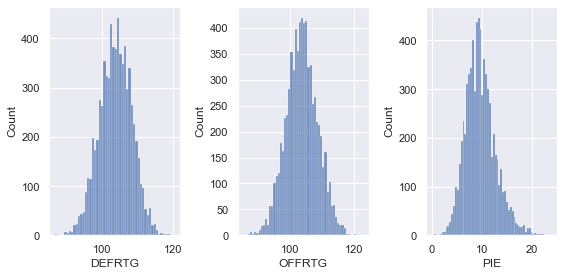

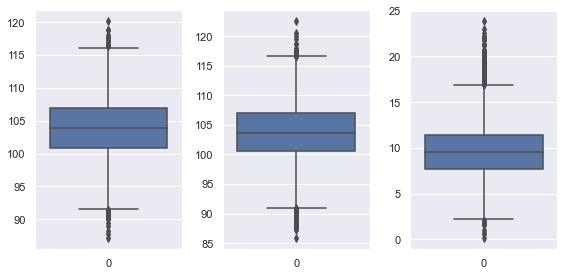

In [21]:
# df = pd.read_csv('../data/data2_clean.csv', index_col=0)

# new_add_cols = ['DEFRTG', 
#              'OFFRTG',
#              'PIE',]



# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
# for col, ax in zip(new_add_cols, axes):
#     sns.histplot(data=df[col], ax=ax);
#     plt.tight_layout()
    
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
# for col, ax in zip(new_add_cols, axes):
#     sns.boxplot(data=df[col], ax=ax);
#     plt.tight_layout()
    


New cols all look fine, don't need to be transformed

## Correlation matrix

<AxesSubplot:>

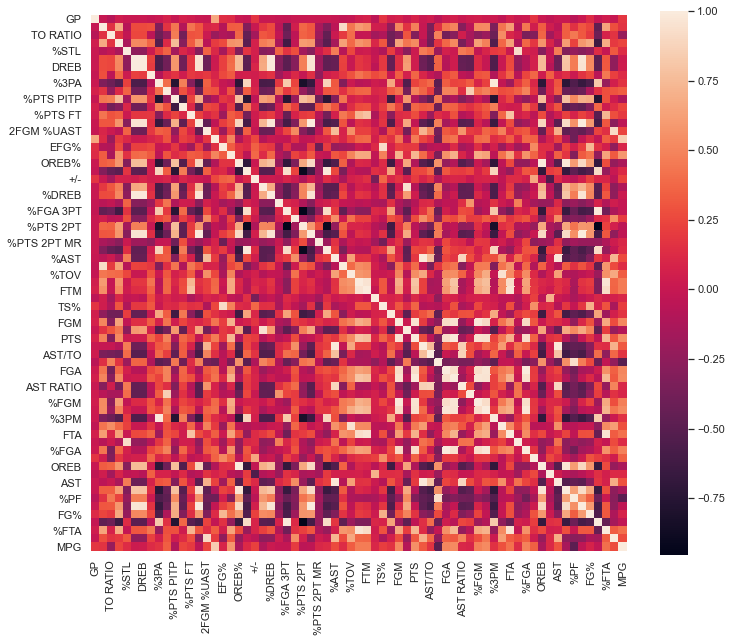

In [99]:
# corr_matrix = df.corr()
# fig, ax = plt.subplots(figsize=(12,10))
# sns.heatmap(corr_matrix, square=True)

In [94]:
# def extract_high_corr_features(data, target, threshold, verbose=False):
#     corr_matrix = data.corr()
#     correlations = abs(corr_matrix[target]).drop(target)
#     if verbose:
#         print(f'Correlations with {target}:\n{correlations.sort_values(ascending=False)}')
#     return correlations.loc[correlations > threshold].index


In [100]:
# extract_high_corr_features(df, 'PIE', 0.3, verbose=True)

Correlations with PIE:
PTS            0.728289
FGM            0.713857
%PTS           0.696970
%FGM           0.684287
%FTM           0.668608
                 ...   
%3PM           0.038794
3PM            0.029435
OPP PITP       0.029309
3P%            0.025935
%PTS 2PT MR    0.006665
Name: PIE, Length: 66, dtype: float64


Index(['%BLKA', 'PITP', 'DREB%', 'DREB', '%PFD', '%PTS FT', '%REB', 'TOT MIN',
       'EFG%', '+/-', '%DREB', 'REB', '%AST', '%TOV', '%FTM', 'FTM', 'TS%',
       'FGM', 'PTS', 'AST%', 'PF', 'FGA', '%PTS', '%FGM', 'USG%', 'TOV', 'FTA',
       '%FGA', 'OFFRTG', 'AST', 'REB%', 'FG%', '%FTA', 'FGM %UAST', 'MPG'],
      dtype='object')

In [138]:
# df_tr.isna().sum().sort_values(ascending=False)

MPG            0
EFG%           0
%AST           0
3PM            0
%PTS 2PT MR    0
              ..
FGM            0
3P%            0
TS%            0
OPP PITP       0
GP             0
Length: 67, dtype: int64

### handle 3pt shooting outliers

In [10]:
## continue transforms with clipping 3pt shooting outliers

## Transforming non 3-pt shooter outliers
df_non_3 = pd.read_csv('../data/data3_clean.csv', index_col=0)
cols3 = ['3PA', '3P%', '3FGM %UAST']
# these are the cols I want to transform: df_non_3.loc[(df_non_3['3PA'] < 1) & ((df_non_3['3P%'] > 35) | (df_non_3['3FGM %UAST'] > 35))]

# get means to impute with
vals = [i/10 for i in range(10)]
means_3percent = [0]
means_unassisted = [0]

for n in vals[1:]:
    shooting_percent_mean = df_non_3[(df_non_3['3PA'] >= (n - 0.1)) & (df_non_3['3PA'] <= (n + 0.1))]['3P%'].mean()
    means_3percent.append(shooting_percent_mean)
    unassisted_mean = df_non_3[(df_non_3['3PA'] >= (n - 0.1)) & (df_non_3['3PA'] <= (n + 0.1))]['3FGM %UAST'].mean()
    means_unassisted.append(unassisted_mean)

## mapping dicts
percent_dict = dict(zip(vals, means_3percent))
unassisted_dict = dict(zip(vals, means_unassisted))


# make transform
df_non_3.loc[(df_non_3['3PA'] < 1) & (df_non_3['3P%'] > 35), ['3P%']] = df_non_3.loc[(df_non_3['3PA'] < 1) & (df_non_3['3P%'] > 35)]['3PA'].map(percent_dict)
df_non_3.loc[(df_non_3['3PA'] < 1) & (df_non_3['3FGM %UAST'] > 35), ['3FGM %UAST']] = df_non_3.loc[(df_non_3['3PA'] < 1) & (df_non_3['3FGM %UAST'] > 35)]['3PA'].map(unassisted_dict)

In [11]:
df_non_3.isna().sum().sort_values(ascending=False)

MPG            0
USG%           0
PITP           0
%PTS 2PT MR    0
TS%            0
              ..
%3PM           0
%PTS           0
2FGM %UAST     0
DREB%          0
TOT MIN        0
Length: 64, dtype: int64

In [12]:
df_non_3['3P%'].describe()
df_master['3P%'].describe()

count    7246.000000
mean       25.971376
std        14.899984
min         0.000000
25%        16.700000
50%        32.300000
75%        36.800000
max        53.800000
Name: 3P%, dtype: float64

count    11149.000000
mean        23.870751
std         17.817075
min          0.000000
25%          0.000000
50%         30.000000
75%         36.400000
max        100.000000
Name: 3P%, dtype: float64

In [13]:
## Do transforms of clipping THEN log
df_tr = df_non_3.copy()

In [14]:
df_tr.loc[(df_tr['3PA'] < 1) & ((df_tr['3P%'] > 35) | (df_tr['3FGM %UAST'] > 35))]
## good

,TOT MIN,%PTS 3PT,FGA,%PTS FBPS,%TOV,FGM %UAST,%DREB,GP,%PTS PITP,%PTS OFFTO,...,%PTS 2PT,3PM,EFG%,%FGM,OREB%,%FTA,DREB,%REB,USG%,MPG


In [15]:
df_tr.head()

,TOT MIN,%PTS 3PT,FGA,%PTS FBPS,%TOV,FGM %UAST,%DREB,GP,%PTS PITP,%PTS OFFTO,...,%PTS 2PT,3PM,EFG%,%FGM,OREB%,%FTA,DREB,%REB,USG%,MPG
A.C. Green 96,2494.0,0.5,10.3,13.4,9.3,29.9,29.9,83,49.6,16.8,...,78.1,0.0,48.5,13.3,8.9,17.6,9.2,31.1,11.8,30.048193
Aaron McKie 96,1624.0,28.4,11.8,18.9,17.6,47.3,17.7,83,35.6,22.4,...,50.3,1.3,46.7,13.2,2.6,12.6,5.9,15.7,14.2,19.566265
Adam Keefe 96,917.0,0.0,9.1,17.9,13.7,17.1,24.4,62,57.0,18.7,...,69.8,0.0,51.3,11.6,9.6,19.2,8.0,27.4,12.4,14.790323
Allan Houston 96,2681.0,37.1,20.0,12.0,16.5,38.7,11.6,81,21.6,16.7,...,48.3,2.9,49.5,22.3,1.8,16.6,3.8,10.3,21.8,33.098765
Allen Iverson 96,3041.0,26.0,24.0,18.5,30.7,65.3,11.0,76,40.6,19.1,...,52.6,2.5,46.7,26.1,3.5,28.0,3.1,11.1,28.1,40.013158


### perform other transformations (LOG)

In [16]:
## from prev notebook

log_cols = ['%3PA',
            '%3PM',
            '%AST',
            '%BLK',
            '%DREB',
            '%FGA 3PT',
            '%OREB',
            '%PF',
            '%PTS 3PT',
            '%REB',
            '%TOV',
            '3FGM %UAST',
            '3PA',
            '3PM',
            'AST',
            'AST RATIO',
            'AST%',
            'AST/TO',
            'BLK',
            'BLKA',
            'DREB',
            'DREB%',
            'FBPS',
            'FG%',
            'FGM',
            'FTA',
            'FTM',
            'OREB',
            'OREB%',
            'PF',
            'REB',
            'REB%',
            'STL',
            'TO RATIO',
            'TOV',]
len(log_cols)

35

In [17]:
df_tr.head()

,TOT MIN,%PTS 3PT,FGA,%PTS FBPS,%TOV,FGM %UAST,%DREB,GP,%PTS PITP,%PTS OFFTO,...,%PTS 2PT,3PM,EFG%,%FGM,OREB%,%FTA,DREB,%REB,USG%,MPG
A.C. Green 96,2494.0,0.5,10.3,13.4,9.3,29.9,29.9,83,49.6,16.8,...,78.1,0.0,48.5,13.3,8.9,17.6,9.2,31.1,11.8,30.048193
Aaron McKie 96,1624.0,28.4,11.8,18.9,17.6,47.3,17.7,83,35.6,22.4,...,50.3,1.3,46.7,13.2,2.6,12.6,5.9,15.7,14.2,19.566265
Adam Keefe 96,917.0,0.0,9.1,17.9,13.7,17.1,24.4,62,57.0,18.7,...,69.8,0.0,51.3,11.6,9.6,19.2,8.0,27.4,12.4,14.790323
Allan Houston 96,2681.0,37.1,20.0,12.0,16.5,38.7,11.6,81,21.6,16.7,...,48.3,2.9,49.5,22.3,1.8,16.6,3.8,10.3,21.8,33.098765
Allen Iverson 96,3041.0,26.0,24.0,18.5,30.7,65.3,11.0,76,40.6,19.1,...,52.6,2.5,46.7,26.1,3.5,28.0,3.1,11.1,28.1,40.013158


In [18]:
## check if any changes to log cols
log_cols = (set(log_cols) - set(drop_cols))

## do the log transform
df_tr.loc[:, log_cols] = df_tr[log_cols].apply(np.log1p)
df_tr

,TOT MIN,%PTS 3PT,FGA,%PTS FBPS,%TOV,FGM %UAST,%DREB,GP,%PTS PITP,%PTS OFFTO,...,%PTS 2PT,3PM,EFG%,%FGM,OREB%,%FTA,DREB,%REB,USG%,MPG
A.C. Green 96,2494.0,0.405465,10.3,13.4,2.332144,29.9,3.430756,83,49.6,16.8,...,78.1,0.000000,48.5,13.3,2.292535,17.6,2.322388,3.468856,11.8,30.048193
Aaron McKie 96,1624.0,3.380995,11.8,18.9,2.923162,47.3,2.928524,83,35.6,22.4,...,50.3,0.832909,46.7,13.2,1.280934,12.6,1.931521,2.815409,14.2,19.566265
Adam Keefe 96,917.0,0.000000,9.1,17.9,2.687847,17.1,3.234749,62,57.0,18.7,...,69.8,0.000000,51.3,11.6,2.360854,19.2,2.197225,3.346389,12.4,14.790323
Allan Houston 96,2681.0,3.640214,20.0,12.0,2.862201,38.7,2.533697,81,21.6,16.7,...,48.3,1.360977,49.5,22.3,1.029619,16.6,1.568616,2.424803,21.8,33.098765
Allen Iverson 96,3041.0,3.295837,24.0,18.5,3.456317,65.3,2.484907,76,40.6,19.1,...,52.6,1.252763,46.7,26.1,1.504077,28.0,1.410987,2.493205,28.1,40.013158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Will Barton 19,1916.0,3.640214,18.8,14.5,2.856470,50.6,3.122365,58,42.8,15.0,...,51.3,1.335001,52.3,19.7,1.609438,16.9,2.128232,3.077312,19.7,33.034483
Willie Cauley-Stein 19,1097.0,0.000000,13.1,11.5,2.646175,21.1,3.414443,54,84.1,18.7,...,89.7,0.000000,57.9,19.7,2.104134,15.0,2.397895,3.490429,14.4,20.314815
Wilson Chandler 19,734.0,4.009150,11.7,9.3,2.639057,24.3,3.182212,35,30.2,10.7,...,36.1,1.223775,50.5,13.2,0.875469,6.2,2.261763,3.039749,12.8,20.971429
Zach LaVine 19,2085.0,3.613617,27.4,13.9,3.440418,54.5,2.954910,60,39.6,17.8,...,46.4,1.648659,52.6,31.7,1.064711,34.6,1.902108,2.833213,31.2,34.750000


In [19]:
zscores = StandardScaler().fit_transform(df_tr)
df_tr = pd.DataFrame(zscores, index=df_tr.index, columns=df_tr.columns)

In [20]:
df_tr.describe()

,TOT MIN,%PTS 3PT,FGA,%PTS FBPS,%TOV,FGM %UAST,%DREB,GP,%PTS PITP,%PTS OFFTO,...,%PTS 2PT,3PM,EFG%,%FGM,OREB%,%FTA,DREB,%REB,USG%,MPG
count,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,...,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03
mean,3.922400e-17,2.039648e-16,4.589208e-16,5.491360e-17,1.372840e-16,2.216156e-16,-7.942860e-16,-4.863776e-16,5.157956e-16,-8.629280e-17,...,-1.412064e-16,-7.844800e-17,-4.706880e-17,-3.785116e-16,1.098272e-16,4.412700e-16,3.020248e-16,1.202216e-15,-3.971430e-17,-3.373264e-16
std,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,...,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00
min,-1.965586e+00,-1.556645e+00,-2.979013e+00,-1.995727e+00,-5.317468e+00,-2.368176e+00,-3.785643e+00,-3.574470e+00,-2.355633e+00,-2.857187e+00,...,-3.195780e+00,-1.289962e+00,-3.465525e+00,-3.145069e+00,-2.423754e+00,-2.056015e+00,-3.311950e+00,-2.982439e+00,-3.006813e+00,-2.212177e+00
25%,-8.361879e-01,-1.131001e+00,-6.891786e-01,-7.604690e-01,-6.590749e-01,-7.177330e-01,-8.063842e-01,-6.016001e-01,-7.543130e-01,-6.852635e-01,...,-7.626880e-01,-1.120979e+00,-6.735943e-01,-7.105806e-01,-8.490090e-01,-7.436279e-01,-7.974839e-01,-8.302724e-01,-7.209085e-01,-8.232036e-01
50%,-7.546656e-02,4.382039e-01,-5.437310e-02,-8.811369e-02,4.430844e-02,-1.527735e-01,-2.370554e-02,2.159393e-01,-1.294076e-01,-6.854448e-02,...,2.293689e-02,1.867693e-01,-4.184371e-02,-7.297632e-02,-1.144000e-01,-1.219708e-01,-3.293790e-02,-3.539657e-02,-8.250282e-02,-2.359105e-02
75%,7.583226e-01,8.270851e-01,6.711189e-01,6.780587e-01,7.075994e-01,6.216653e-01,8.203129e-01,8.105133e-01,6.852013e-01,6.286162e-01,...,8.730534e-01,8.797676e-01,5.899069e-01,6.419133e-01,9.205039e-01,5.917836e-01,8.040617e-01,8.779099e-01,6.382778e-01,8.164200e-01
max,2.577229e+00,1.420729e+00,3.935833e+00,4.727827e+00,3.309777e+00,3.179852e+00,2.654537e+00,1.330766e+00,3.151346e+00,5.884135e+00,...,2.192200e+00,2.396847e+00,5.032540e+00,3.733328e+00,2.314176e+00,4.448360e+00,2.765863e+00,2.389808e+00,4.365743e+00,2.401990e+00


In [21]:
df_tr.to_csv('../data/data3_tr.csv')

In [22]:
df_tr.isna().sum().sort_values(ascending=False)

MPG            0
USG%           0
PITP           0
%PTS 2PT MR    0
TS%            0
              ..
%3PM           0
%PTS           0
2FGM %UAST     0
DREB%          0
TOT MIN        0
Length: 64, dtype: int64

## PCA

In [25]:
df = pd.read_csv('../data/data3_tr.csv', index_col=0)
pca = PCA(n_components=0.99)
pca.fit(df)
pca.n_components_
df_pca = pd.DataFrame(pca.transform(df), index=df.index, columns=[f'pc_{n}' for n in range(pca.n_components_)])
df_pca.head()
df_pca.to_csv('../data/pca3_99.csv')

PCA(n_components=0.99)

25

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_15,pc_16,pc_17,pc_18,pc_19,pc_20,pc_21,pc_22,pc_23,pc_24
A.C. Green 96,4.455119,-2.983359,0.181936,-0.967597,0.852477,-2.900565,0.955602,1.826850,-2.567098,0.363804,...,0.082193,0.902740,-0.148011,-0.149064,-0.576336,1.084741,1.380855,0.081723,0.017004,-0.654580
Aaron McKie 96,-2.622212,-2.236079,-2.629880,-1.203383,-1.605217,-0.128617,1.770332,1.806729,0.509938,-0.910675,...,0.160451,-1.325331,-0.876818,1.021608,0.281881,0.571022,-0.074059,0.183598,0.170912,0.290594
Adam Keefe 96,6.000270,-3.249878,-1.474709,-0.393341,-2.323437,-1.893456,-0.165950,2.123409,1.270324,1.056059,...,0.221790,1.149842,-0.562339,0.530034,0.178761,-0.161607,0.496937,-0.131965,-0.169235,-0.323520
Allan Houston 96,-4.206984,0.315221,1.801221,2.235128,0.749353,-0.536486,-1.168856,0.855855,0.659788,-3.058227,...,0.034095,-0.139770,0.371217,-0.763498,-0.270038,0.026575,0.395680,0.137437,0.024283,-0.245663
Allen Iverson 96,-5.257438,6.088375,-2.221098,0.293810,-1.382227,-0.225248,0.821083,-0.897161,-1.331013,-2.180341,...,-1.170343,1.073684,0.882810,-0.214931,0.087983,-0.015257,0.138642,-0.467302,-0.372734,-0.058445


In [26]:
df_pca['pc_0'].sort_values(ascending=False)[0:15]
df_pca['pc_0'].sort_values(ascending=True)[0:15]

## interesting split based on pc0

Hassan Whiteside 14    12.017574
Bismack Biyombo 13     11.098453
Dikembe Mutombo 05     10.699801
Hassan Whiteside 15    10.680739
DeAndre Jordan 08      10.677149
Joel Przybilla 09      10.673817
Joel Przybilla 07      10.536241
Jahidi White 03        10.484645
Jahidi White 99        10.476307
Dikembe Mutombo 06     10.419191
Joel Przybilla 08      10.391219
Danny Fortson 04       10.343426
Dewayne Dedmon 14      10.259077
Alonzo Mourning 05     10.236100
Jahidi White 01        10.189163
Name: pc_0, dtype: float64

Joe Dumars 97       -9.183302
Jason Williams 03   -9.036515
Jason Williams 04   -8.485714
Jason Williams 02   -8.477678
Jason Williams 01   -8.474409
Jason Williams 09   -8.429199
Kenny Smith 96      -8.428527
Jason Williams 06   -8.316556
Jason Williams 98   -8.306055
Nick Van Exel 96    -8.247503
Damon Jones 07      -8.222574
Jason Williams 07   -8.177406
Chucky Atkins 03    -8.156977
Jason Williams 99   -8.118964
Earl Boykins 05     -8.113131
Name: pc_0, dtype: float64

In [39]:
# ## Just proofing some stuff...

# c1 = pd.read_csv('../data/data2_clean.csv', index_col=0)
# c2 = pd.read_csv('../data/data_clean2.csv', index_col=0)

In [42]:
# c1.head()
# c2.head()

,GP,%BLKA,TO RATIO,PITP,%STL,DREB%,DREB,%PFD,%3PA,FBPS,...,DEFRTG,AST,%OREB,%PF,REB%,FG%,%PTS 3PT,%FTA,FGM %UAST,MPG
A.C. Green 96,83,15.5,10.3,6.3,18.1,18.4,9.2,0.4,2.6,1.7,...,104.8,1.5,33.9,14.8,13.5,48.3,0.5,17.6,29.9,30.048193
Aaron McKie 96,83,22.6,13.5,5.0,30.1,11.3,5.9,0.0,16.6,2.7,...,97.8,5.2,10.2,17.3,7.1,41.1,28.4,12.6,47.3,19.566265
Adam Keefe 96,62,16.5,15.9,7.6,18.5,15.8,8.0,0.2,0.5,2.4,...,99.4,1.8,35.5,20.2,12.9,51.3,0.0,19.2,17.1,14.790323
Allan Houston 96,81,19.6,11.4,5.0,10.1,7.5,3.8,0.1,44.7,2.8,...,99.4,3.5,6.8,17.6,4.8,42.3,37.1,16.6,38.7,33.098765
Allen Iverson 96,76,26.5,12.7,11.6,29.0,6.4,3.1,0.0,42.8,5.3,...,111.4,9.1,11.3,17.2,4.9,41.6,26.0,28.0,65.3,40.013158


,FTM,AST,3PM,%STL,OREB,AST%,DREB%,%PTS 3PT,%PTS FT,BLKA,...,%BLKA,PIE,%PTS FBPS,%FGA 3PT,FGM %UAST,OREB%,PTS,%BLK,%PTS PITP,MPG
A.C. Green 96,2.7,1.5,0.0,18.1,4.7,4.5,18.4,0.5,21.4,0.9,...,15.5,9.8,13.4,4.1,29.9,8.9,12.7,8.4,49.6,30.048193
Aaron McKie 96,3.0,5.2,1.3,30.1,1.3,16.3,11.3,28.4,21.2,1.2,...,22.6,9.5,18.9,28.2,47.3,2.6,14.0,12.4,35.6,19.566265
Adam Keefe 96,4.0,1.8,0.0,18.5,4.2,5.1,15.8,0.0,30.2,0.7,...,16.5,8.3,17.9,0.6,17.1,9.6,13.3,16.9,57.0,14.790323
Allan Houston 96,3.4,3.5,2.9,10.1,0.8,11.7,7.5,37.1,14.6,0.7,...,19.6,7.8,12.0,37.2,38.7,1.8,23.2,6.7,21.6,33.098765
Allen Iverson 96,6.1,9.1,2.5,29.0,1.8,32.0,6.4,26.0,21.4,1.7,...,26.5,10.7,18.5,30.3,65.3,3.5,28.5,7.6,40.6,40.013158
